## Purpose of the project
- We are having a cars dataset having resell price,car name, year and month of registration, gearbox type, power , model,km driven and fuel type.
- Now with this we want to create a model to predict the resell price from the provided data and to analyse the same.

### 1. Load the cars dataset.
### 2. Figure out the best strategy to fill missing values
### 3. Complete any other preprocessing required.
### 4. Apply various regression models and find out which model is the best for this dataset
### 5. Apply different Outlier detection methods and choose best approach to treat outliers
### 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression



import warnings 
warnings.filterwarnings(action = 'ignore', module = 'scipy',message = '^internal gelsd')

In [3]:
# Reading Out the Dataset
carset = pd.read_csv('autos_small.csv')

In [4]:
# Reviewing the Dataset
carset.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [5]:
# Having look at Datatype anf null count
carset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [6]:
# Columns having null value
carset[carset.columns[carset.isna().any()]]

,gearbox,model,fuelType,vehicleType
0,manuell,escort,benzin,kombi
1,manuell,3er,NaN,cabrio
2,manuell,c_klasse,benzin,kombi
3,manuell,a3,diesel,limousine
4,automatik,fortwo,diesel,cabrio
...,...,...,...,...
9995,manuell,corsa,benzin,kleinwagen
9996,manuell,touran,diesel,bus
9997,NaN,astra,NaN,kombi
9998,manuell,twingo,benzin,kleinwagen


In [7]:
carset.isna().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [8]:
# So, intotal 4 columns are hvaing null values, so we will eleminate all the rows having 2 or more NaN, as it can develop more errors in model.
c1=carset.dropna(thresh=9,axis=0)


In [9]:
c1.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                341
powerPS                  0
model                  409
kilometer                0
fuelType               662
brand                    0
vehicleType            778
dtype: int64

In [10]:
#Still there are lots of null data available.

In [11]:
# carset[carset['model'].isna() & carset['vehicleType'].isna() & carset['fuelType'].isna() & carset['gearbox'].isna()]

In [12]:
c1['fuelType'].value_counts() # can be easily encoded by label/onehot/frequency count

benzin     5962
diesel     2910
lpg         147
cng          12
hybrid        7
andere        5
elektro       2
Name: fuelType, dtype: int64

In [13]:
c1['vehicleType'].value_counts() # can be easily encoded by label/onehot/frequency count

limousine     2515
kleinwagen    2143
kombi         1763
bus            846
cabrio         638
coupe          541
suv            385
andere          98
Name: vehicleType, dtype: int64

In [14]:
c1['model'].value_counts()  # Too many Different Categories, need to check importance of this column else we can remove this column

golf           810
andere         697
3er            555
polo           379
corsa          323
              ... 
145              1
forester         1
200              1
delta            1
range_rover      1
Name: model, Length: 235, dtype: int64

In [15]:
c1['gearbox'].value_counts() # can be easily encoded with the help of mode

manuell      7270
automatik    2096
Name: gearbox, dtype: int64

<AxesSubplot:>

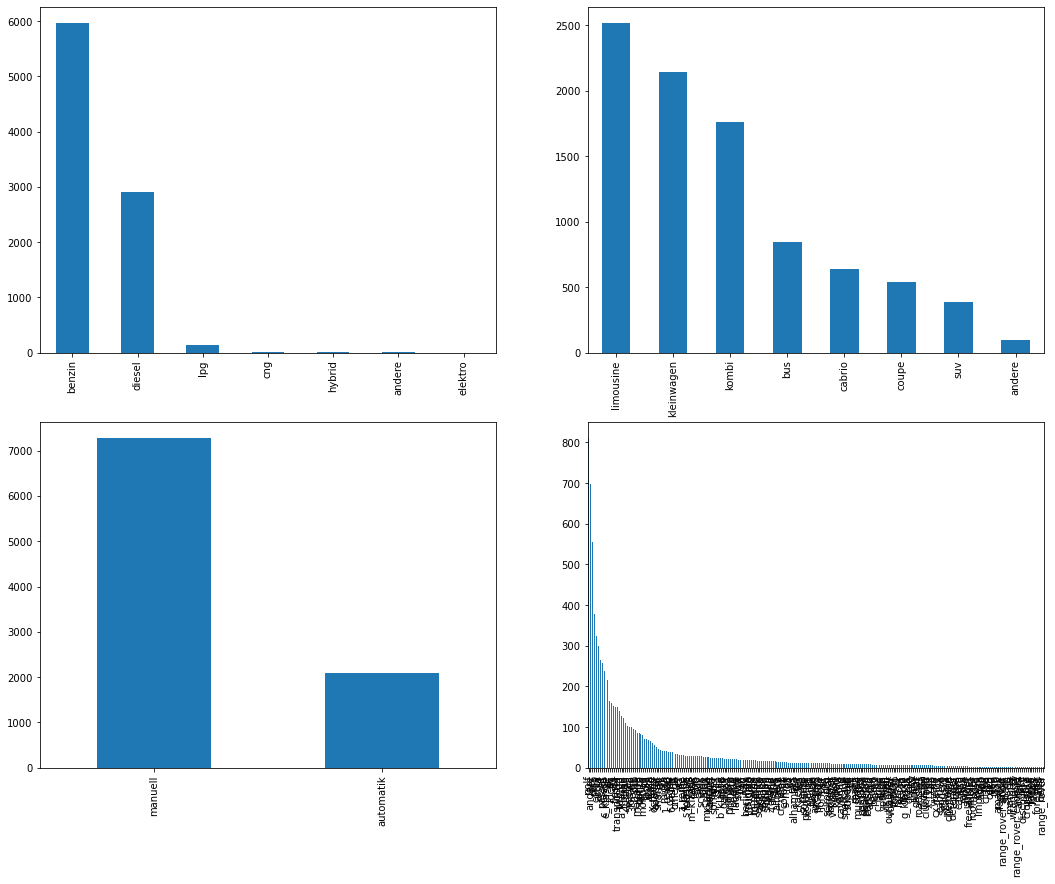

In [16]:
# Let's look at columns having null values and figure out how to handle those
plt.figure(figsize=(18,14))
plt.subplot(2,2,1)
c1['fuelType'].value_counts().plot(kind='bar')

plt.subplot(2,2,2)
c1['vehicleType'].value_counts().plot(kind='bar')

plt.subplot(2,2,3)
c1['gearbox'].value_counts().plot(kind='bar')

plt.subplot(2,2,4)
c1['model'].value_counts().plot(kind='bar')

In [17]:
# looking at the various entries we found that there are various rows having 
c1[(c1['name'].str.contains('automatik')) & c1['gearbox'].isna()]

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
2167,300,Opel_Astra_automatik,1994,4,NaN,71,astra,150000,benzin,opel,limousine


In [18]:
c1[(c1['name'].str.contains('Automatik')) & c1['gearbox'].isna()]

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
806,14650,Mercedes_Benz_SLK_200_Kompressor_Automatik,2008,3,NaN,0,slk,125000,benzin,mercedes_benz,cabrio
4395,22900,Mercedes_Benz_SLK_200_Kompressor_Automatik,2011,9,NaN,0,slk,60000,benzin,mercedes_benz,cabrio
5423,849,VW_Polo_6N1_Rechtslenker__RHD_mit_Automatikget...,1996,8,NaN,75,polo,150000,benzin,volkswagen,kleinwagen
5666,1600,Vw_new_beetle_2.0_Automatik,2005,10,NaN,0,beetle,150000,benzin,volkswagen,NaN


In [19]:
# from above result we can replace gearbox value of nan with automatik if name is having Automatik in it.
c1['gearbox'].mask(c1['name'].str.contains('Automatik'),'automatik',inplace=True)
c1['gearbox'].mask(c1['name'].str.contains('automatik'),'automatik',inplace=True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\3511333069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['gearbox'].mask(c1['name'].str.contains('Automatik'),'automatik',inplace=True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\3511333069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['gearbox'].mask(c1['name'].str.contains('automatik'),'automatik',inplace=True)


In [20]:
# From the above barplot we clearly found that most of the cars are manuell so, we can definitely fillna with that
c1['gearbox'].fillna('manuell',inplace = True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\2602741353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['gearbox'].fillna('manuell',inplace = True)


In [21]:
c1.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                  0
powerPS                  0
model                  409
kilometer                0
fuelType               662
brand                    0
vehicleType            778
dtype: int64

In [22]:
c1[(c1['name'].str.contains('TDI'))]

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
21,7399,Volkswagen_Passat_Variant_2.0_TDI_DPF_DSG_Indi...,2007,10,automatik,140,passat,150000,diesel,volkswagen,kombi
28,5299,Volkswagen_Volkswagen_Golf_1.9_TDI___AHK___DPF...,2004,11,manuell,105,golf,150000,diesel,volkswagen,limousine
35,9300,Audi_A4_Avant_2.0_TDI_DPF_S_LINE_INT._+EXT._XE...,2007,8,manuell,205,a4,150000,diesel,audi,kombi
36,10500,Audi_A4_Quattro__3.0_TDI__DPF_1._Hand_unfallfr...,2005,3,manuell,203,a4,150000,diesel,audi,andere
50,5200,Skoda_Superb_2_5_TDI_Automatik_Elegance,2005,3,automatik,163,superb,150000,diesel,skoda,limousine
...,...,...,...,...,...,...,...,...,...,...,...
9977,2210,A4_Avant_1.9_TDI_MMI_TV_Bose_DPF_Xenon_Carbon,2002,11,manuell,131,a4,150000,diesel,audi,kombi
9989,3600,Vw_t4_TDI_2.5_l_transporter_caravelle_lkw_TÜV_...,2001,2,manuell,102,transporter,150000,diesel,volkswagen,bus
9993,5190,Volkswagen_Golf_1.9_TDI_Tour_Edition,2007,10,manuell,105,golf,150000,diesel,volkswagen,limousine
9994,5200,Volkswagen_Golf_Plus_1.9_TDI,2005,12,manuell,90,golf,150000,diesel,volkswagen,bus


In [23]:
# looking at the Data we found that if TDI is present in name than fuelType of the car is diesel
c1[(c1['name'].str.contains('TDI')) & c1['fuelType'].isna()]

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
144,10950,Audi_a6_2.7_TDI_tiptronic,2017,7,automatik,179,a6,150000,NaN,audi,NaN
412,11250,VW_Golf_6_VI_Variant_Exclusive_2.0_TDI,2018,12,manuell,140,golf,150000,NaN,volkswagen,NaN
1242,2000,Audi_A4_Avant_1.9_TDI_Pumpe_Duese_115PS_Tiptro...,2001,0,automatik,115,a4,150000,NaN,audi,kombi
1324,2222,VW_Golf_1.6_TDI,2016,8,manuell,90,golf,150000,NaN,volkswagen,NaN
1805,4300,Audi_A6_4b_Avant_2.5TDI_S_line,2005,8,automatik,163,a6,150000,NaN,audi,NaN
2364,4500,Volkswagen_Sharan_1.9_TDI,2018,8,manuell,0,sharan,150000,NaN,volkswagen,NaN
2675,1500,Polo_9n_1.4_TDI__TÜV_12/17,2017,11,manuell,75,polo,150000,NaN,volkswagen,NaN
3665,12999,VW_Passat_CC_2.0_TDI_mit_super_Ausstattung,2009,0,manuell,184,passat,150000,NaN,volkswagen,NaN
3676,14999,Audi_A4_S_line_plus_3.0_TDI_Quattro,2008,10,automatik,239,a4,150000,NaN,audi,limousine
4453,7000,Variant_Golf_V_TDI__2_0__UNFALLFREI,2008,10,automatik,140,golf,125000,NaN,volkswagen,kombi


In [24]:
# In the Rows having TDI in name, filling the nan values of fuelType with diesel 
c1['fuelType'].mask(c1['name'].str.contains('TDI'),'diesel',inplace=True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\1914132528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['fuelType'].mask(c1['name'].str.contains('TDI'),'diesel',inplace=True)


In [25]:
c1.isna().sum()

price                    0
name                     0
yearOfRegistration       0
monthOfRegistration      0
gearbox                  0
powerPS                  0
model                  409
kilometer                0
fuelType               645
brand                    0
vehicleType            778
dtype: int64

In [26]:
# Now only 3 Columns are having Missing Values, as all of them are having more than 5 unique values we will fillnan with missing.
c1['fuelType'].fillna('missing',inplace = True)
c1['vehicleType'].fillna('missing',inplace = True)
c1['model'].fillna('missing',inplace = True)

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\1611514670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['fuelType'].fillna('missing',inplace = True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\1611514670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['vehicleType'].fillna('missing',inplace = True)
C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\1611514670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['

In [27]:
c1.isna().sum()
# Great!! all columns are now with 0 NaN

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

<AxesSubplot:>

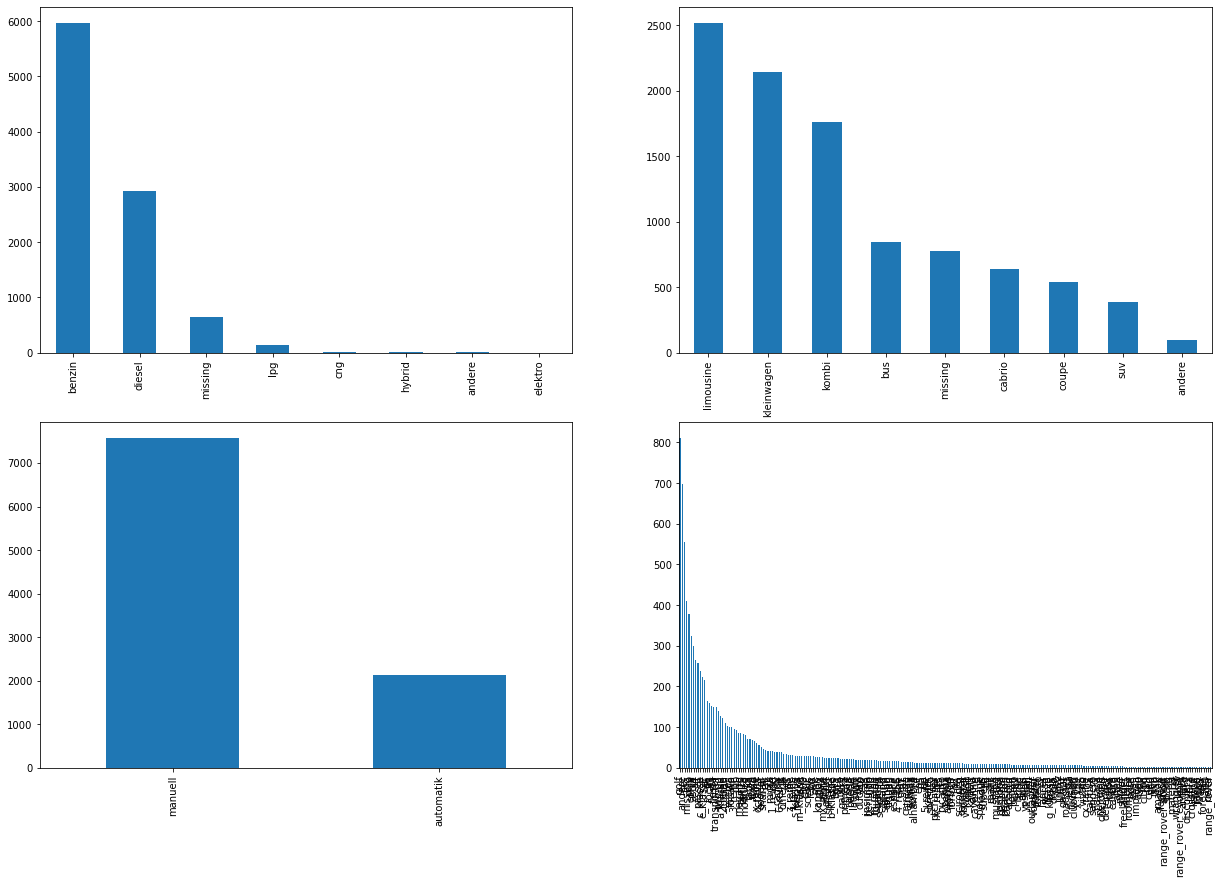

In [28]:
plt.figure(figsize=(21,14))
plt.subplot(2,2,1)
c1['fuelType'].value_counts().plot(kind='bar')

plt.subplot(2,2,2)
c1['vehicleType'].value_counts().plot(kind='bar')

plt.subplot(2,2,3)
c1['gearbox'].value_counts().plot(kind='bar')

plt.subplot(2,2,4)
c1['model'].value_counts().plot(kind='bar')

# Now for further step we need to do several preprocessing to proceed for Regression
- In which we need to remove the Outliers so, that we can improve our results accuracy.
- There are many categorical Columns present so, we need to encode them.
- Also we need to do steps we handle various column

In [29]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9707 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                9707 non-null   int64 
 1   name                 9707 non-null   object
 2   yearOfRegistration   9707 non-null   int64 
 3   monthOfRegistration  9707 non-null   int64 
 4   gearbox              9707 non-null   object
 5   powerPS              9707 non-null   int64 
 6   model                9707 non-null   object
 7   kilometer            9707 non-null   int64 
 8   fuelType             9707 non-null   object
 9   brand                9707 non-null   object
 10  vehicleType          9707 non-null   object
dtypes: int64(5), object(6)
memory usage: 910.0+ KB


In [30]:
c1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,missing,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel_Corsa_C_1.2_Twinport,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen_Touran_2.0_TDI_DPF,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche_zuverlaessigen_Kombi,1999,0,manuell,101,astra,150000,missing,opel,kombi
9998,970,Renault_Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [31]:
# Name column is having many _ between words so we will just remove those
c1['name']= c1['name'].str.replace('_',' ')

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\3324499874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['name']= c1['name'].str.replace('_',' ')


In [32]:
# In name column only first 3 words seems to be informative so let just trim it.
c1['name']=c1['name'].str.split(' ').str.slice(0,3).str.join(' ')

C:\Users\Viren\AppData\Local\Temp\ipykernel_7328\1832409865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['name']=c1['name'].str.split(' ').str.slice(0,3).str.join(' ')


In [33]:
# index reset
c1.reset_index(drop=True)

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw 320 cabrio,1996,0,manuell,150,3er,125000,missing,bmw,cabrio
2,2200,Mercedes C 230,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3 Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart Smart cabrio,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9702,2650,Opel Corsa C,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9703,9600,Volkswagen Touran 2.0,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9704,1500,Suche zuverlaessigen Kombi,1999,0,manuell,101,astra,150000,missing,opel,kombi
9705,970,Renault Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [34]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9707 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                9707 non-null   int64 
 1   name                 9707 non-null   object
 2   yearOfRegistration   9707 non-null   int64 
 3   monthOfRegistration  9707 non-null   int64 
 4   gearbox              9707 non-null   object
 5   powerPS              9707 non-null   int64 
 6   model                9707 non-null   object
 7   kilometer            9707 non-null   int64 
 8   fuelType             9707 non-null   object
 9   brand                9707 non-null   object
 10  vehicleType          9707 non-null   object
dtypes: int64(5), object(6)
memory usage: 910.0+ KB


In [35]:
c1.corr()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
price,1.000000,0.005539,-0.012521,0.007433,-0.022412
yearOfRegistration,0.005539,1.000000,0.006050,0.023966,-0.093537
monthOfRegistration,-0.012521,0.006050,1.000000,-0.000830,-0.008233
powerPS,0.007433,0.023966,-0.000830,1.000000,-0.006067
kilometer,-0.022412,-0.093537,-0.008233,-0.006067,1.000000


In [36]:
c1.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,9.707000e+03,9707.000000,9707.000000,9707.000000,9707.000000
mean,7.213252e+03,2003.554136,5.850623,124.625116,125603.688060
std,1.255982e+05,23.336880,3.655856,346.608029,39706.465193
min,0.000000e+00,1234.000000,0.000000,0.000000,5000.000000
25%,1.200000e+03,1999.000000,3.000000,75.000000,100000.000000
50%,3.000000e+03,2004.000000,6.000000,107.000000,150000.000000
75%,7.494500e+03,2008.000000,9.000000,150.000000,150000.000000
max,1.234568e+07,4000.000000,12.000000,17322.000000,150000.000000


In [37]:
# here we found that max price is way too high so need to remove this
# also year of reg is also way too old let's remove those

In [38]:
c1 = c1[c1['price']<1e7]

In [39]:
c1

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw 320 cabrio,1996,0,manuell,150,3er,125000,missing,bmw,cabrio
2,2200,Mercedes C 230,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3 Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart Smart cabrio,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
...,...,...,...,...,...,...,...,...,...,...,...
9995,2650,Opel Corsa C,2005,1,manuell,80,corsa,150000,benzin,opel,kleinwagen
9996,9600,Volkswagen Touran 2.0,2011,6,manuell,140,touran,150000,diesel,volkswagen,bus
9997,1500,Suche zuverlaessigen Kombi,1999,0,manuell,101,astra,150000,missing,opel,kombi
9998,970,Renault Twingo,2002,10,manuell,58,twingo,150000,benzin,renault,kleinwagen


In [40]:
c1= c1[c1['yearOfRegistration'] > 1950]

In [41]:
c1=c1[c1['yearOfRegistration']<2020].reset_index(drop=True)

In [42]:
c1.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000
mean,5941.438763,2003.493402,5.854124,124.649072,125651.546392
std,9401.018711,7.378997,3.654258,346.701722,39643.519557
min,0.000000,1951.000000,0.000000,0.000000,5000.000000
25%,1200.000000,1999.000000,3.000000,75.000000,125000.000000
50%,3000.000000,2004.000000,6.000000,107.000000,150000.000000
75%,7490.000000,2008.000000,9.000000,150.000000,150000.000000
max,285000.000000,2019.000000,12.000000,17322.000000,150000.000000


In [43]:
# So, before proceeding for regression we need to do encoding for categorical variable like: name,gearbox, model, fueltype, brand, vehicletype.

In [44]:
# Lets look at unique values of categorical cols

In [45]:
c1.columns

Index(['price', 'name', 'yearOfRegistration', 'monthOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleType'],
      dtype='object')

In [46]:
# Selecting all categorical column
c1_cat = c1.select_dtypes(include='object')

In [47]:
#getting the list of unique values and number of unique values of all categorical columns
for col in c1_cat:
    a= c1_cat[col].nunique()
    b= c1_cat[col].unique()
    print(col)
    print(a)
    print(b)

name
5218
['Ford Escort' 'Bmw 320 cabrio' 'Mercedes C 230' ... 'Vw T2a Westfalia'
 'Ford Fusion 1.25' 'Suche zuverlaessigen Kombi']
gearbox
2
['manuell' 'automatik']
model
236
['escort' '3er' 'c_klasse' 'a3' 'fortwo' 'yaris' 'a4' 'golf' 'transporter'
 'slk' 'andere' 'missing' 'zafira' 'corsa' 'twingo' 'arosa' 'passat'
 'mx_reihe' '2_reihe' 'rav' 'mondeo' 'x_reihe' 'kalos' 'a2' 'ka' 'fiesta'
 '911' '5er' 'superb' 'i_reihe' 'polo' 'touran' 'octavia' 'omega' 'lupo'
 'e_klasse' 'm_klasse' 'a6' 'almera' 'meriva' 'santa' 'a_klasse' 'citigo'
 'caddy' 'signum' 's_klasse' 'leon' '6_reihe' '80' 'a8' 'vito' 'astra'
 'sprinter' 'clio' 'cooper' 'seicento' 'bora' 'eos' 'a1' '1er' 'ptcruiser'
 'tigra' 'vectra' 'ibiza' 'touareg' 'mii' 'civic' 'fox' 'a5' 'boxster'
 '3_reihe' 'tt' 'sorento' 'corolla' 'viano' 'insignia' 'megane' 'fabia'
 'espace' 'm_reihe' 'exeo' 'kadett' 'c4' 'z_reihe' 'q5' 'lancer' 'one'
 'bravo' 'clk' '1_reihe' 'punto' 'beetle' '100' 'scirocco' '147' 'jimny'
 'sl' 'x_type' 'sharan' 'r

- From this we can see that **Gearbox,vehicleType,fuelType** can be easily encoded by onehotencoding but for **name,model and brand** there are way too many categories to be encoded

In [53]:
# name column was having combined Data of brand and model, so we can remove the column
c1 = c1.drop(columns='name',axis=1)

In [54]:
# As brand and model are having more than 10 categories it is not feasible to use onehotencoding so we will use target encoding
from category_encoders import TargetEncoder
te = TargetEncoder(cols=['brand','model'],drop_invariant=False,smoothing=1.0,min_samples_leaf=1,return_df= True).fit_transform(X=c1[['brand','model']],y=c1['price'])
# te.fit(X=c1[col],y=c1[target])
# values = te.transform(c1[col])
# c1 = pd.concat([c1,values],axis = 1)
te.head()

C:\Users\Viren\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Viren\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,brand,model
0,3618.827957,681.520000
1,8524.547996,5994.648649
2,8403.704570,7061.772152
3,9022.866745,8107.421053
4,3547.923077,3790.198020


In [55]:
# concatenating the output of target encoder with original dataset
c1= c1.drop(['brand','model'],axis=1)
c1 = pd.concat([c1,te],axis = 1)
c1

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,vehicleType,brand,model
0,400,1992,8,manuell,89,60000,benzin,kombi,3618.827957,681.520000
1,3500,1996,0,manuell,150,125000,missing,cabrio,8524.547996,5994.648649
2,2200,1998,0,manuell,150,150000,benzin,kombi,8403.704570,7061.772152
3,4000,2006,7,manuell,0,150000,diesel,limousine,9022.866745,8107.421053
4,2600,2002,7,automatik,41,150000,diesel,cabrio,3547.923077,3790.198020
...,...,...,...,...,...,...,...,...,...,...
9695,2650,2005,1,manuell,80,150000,benzin,kleinwagen,3026.266729,1917.585139
9696,9600,2011,6,manuell,140,150000,diesel,bus,5221.641847,7637.908257
9697,1500,1999,0,manuell,101,150000,missing,kombi,3026.266729,3077.126667
9698,970,2002,10,manuell,58,150000,benzin,kleinwagen,2315.350538,1313.100719


In [58]:
c1['price']

0        400
1       3500
2       2200
3       4000
4       2600
        ... 
9695    2650
9696    9600
9697    1500
9698     970
9699    7990
Name: price, Length: 9700, dtype: int64

In [59]:
c1.corr()['price']

price                  1.000000
yearOfRegistration     0.254201
monthOfRegistration    0.048850
powerPS                0.108468
kilometer             -0.382903
brand                  0.436322
model                  0.547524
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

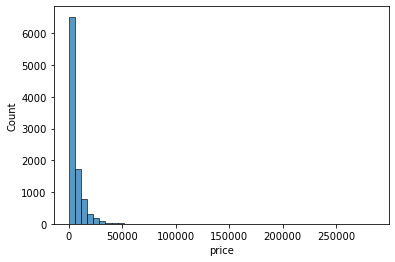

In [60]:
sns.histplot(c1['price'],bins =50)
#This is Totally Skewed Data

In [61]:
# sns.histplot(np.log(c1['price']),bins=100)
# # #by applying log we have converted to normally distributed data

In [62]:
# Spilliting in to x and y
X = c1.drop(columns =['price'])
y = c1['price']

In [63]:
# importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [1]:
# hereby we have used column transformer, pipeline and different metrics
# Column transformer will help in applying various transitions on columns in single step
# Pipeline will help to apply various step in single command
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

ohe = OneHotEncoder()

column_trans = make_column_transformer((OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),['gearbox','fuelType','vehicleType']),
                                       remainder = 'passthrough')


In [65]:
# Creating lr model
lr = LinearRegression()

In [66]:
# creating pipeline
pipe = make_pipeline(column_trans,lr)

In [67]:
#Fit the pipeline with training set
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gearbox', 'fuelType',
                                                   'vehicleType'])])),
                ('linearregression', LinearRegression())])

In [68]:
# store the output in y_pred so that we can compare with ytest
y_pred = pipe.predict(X_test)

In [69]:
# r2 score for thde model
r2_score(y_test,y_pred)

0.4736539046559962

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

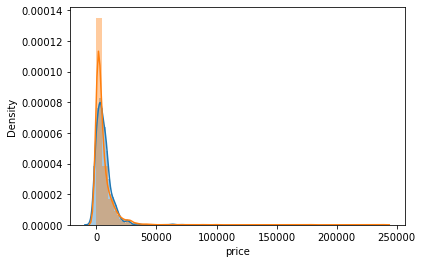

In [70]:
sns.distplot(y_pred)
sns.distplot(y_test)

In [71]:
# let's check for various random state and get best score
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

In [72]:
# from above let's get the state having maximum score
np.argmax(scores)

970

In [73]:
# now as we have got random_state with maximum score we can proceed with the Train test split.
# then we can fit that with the pipeline consisting of column transformation of one hot encoding and linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.6620124140359598

In [74]:
# mean absolute error 
mean_absolute_error(y_test,y_pred)

3140.1718710342766

<AxesSubplot:xlabel='price'>

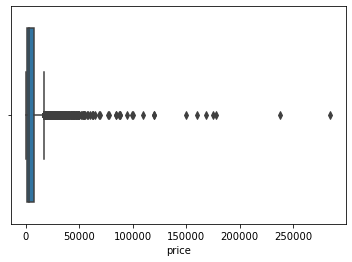

In [75]:
# there are many outliers in price column as seen in boxplot
sns.boxplot(x=c1['price'])

In [76]:
# to improve the accuracy we can use quantile and remove various outliers
c1.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,brand,model
count,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000
mean,5941.438763,2003.493402,5.854124,124.649072,125651.546392,5941.461971,5937.392455
std,9401.018711,7.378997,3.654258,346.701722,39643.519557,4101.867359,5114.431153
min,0.000000,1951.000000,0.000000,0.000000,5000.000000,994.725467,681.520000
25%,1200.000000,1999.000000,3.000000,75.000000,125000.000000,3588.022951,3077.126667
50%,3000.000000,2004.000000,6.000000,107.000000,150000.000000,5221.641847,4891.529703
75%,7490.000000,2008.000000,9.000000,150.000000,150000.000000,8403.704570,6981.642857
max,285000.000000,2019.000000,12.000000,17322.000000,150000.000000,46943.944444,71079.956504


In [96]:
# creating upper limit criteria for our dataset
upper_limit = c1['price'].quantile(0.999)
upper_limit

103003.01000001296

In [97]:
# creating lower limit criteria for our dataset
lower_limit = c1['price'].quantile(0.1)
lower_limit

500.0

In [98]:
# creating updated dataset after removing outliers
c2 = c1[(c1['price']<upper_limit)&(c1['price']>lower_limit)].reset_index(drop=True)

In [99]:
c2

,price,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,vehicleType,brand,model
0,3500,1996,0,manuell,150,125000,missing,cabrio,8524.547996,5994.648649
1,2200,1998,0,manuell,150,150000,benzin,kombi,8403.704570,7061.772152
2,4000,2006,7,manuell,0,150000,diesel,limousine,9022.866745,8107.421053
3,2600,2002,7,automatik,41,150000,diesel,cabrio,3547.923077,3790.198020
4,2222,2001,10,manuell,143,150000,benzin,limousine,8524.547996,5994.648649
...,...,...,...,...,...,...,...,...,...,...
8679,2650,2005,1,manuell,80,150000,benzin,kleinwagen,3026.266729,1917.585139
8680,9600,2011,6,manuell,140,150000,diesel,bus,5221.641847,7637.908257
8681,1500,1999,0,manuell,101,150000,missing,kombi,3026.266729,3077.126667
8682,970,2002,10,manuell,58,150000,benzin,kleinwagen,2315.350538,1313.100719


In [100]:
# Again Divide data in X and y
X = c2.drop(columns =['price'])
y = c2['price']

In [101]:
# let's check for various random state and get best score
scores = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Viren\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

In [102]:
# now as we have got random_state with maximum score we can proceed with the Train test split.
# then we can fit that with the pipeline consisting of column transformation of one hot encoding and linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7093905344898115

In [103]:
# After removing outliers accuracy of model have drastically increased.

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

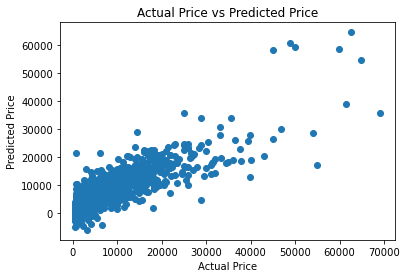

In [104]:
# scatter plot to see the differences in actual and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Viren\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

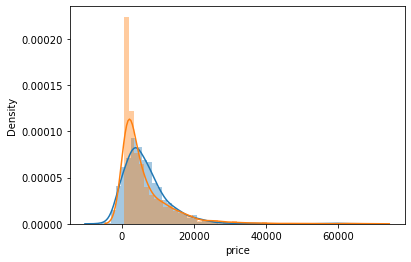

In [105]:
# let's see the distribution of predicted and actual price
sns.distplot(y_pred)
sns.distplot(y_test)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [107]:
y, X = dmatrices('price ~ yearOfRegistration+monthOfRegistration+gearbox+powerPS+kilometer+fuelType+vehicleType+brand+model', data=c2, return_type='dataframe')


In [109]:
X.columns

Index(['Intercept', 'gearbox[T.manuell]', 'fuelType[T.benzin]',
       'fuelType[T.cng]', 'fuelType[T.diesel]', 'fuelType[T.elektro]',
       'fuelType[T.hybrid]', 'fuelType[T.lpg]', 'fuelType[T.missing]',
       'vehicleType[T.bus]', 'vehicleType[T.cabrio]', 'vehicleType[T.coupe]',
       'vehicleType[T.kleinwagen]', 'vehicleType[T.kombi]',
       'vehicleType[T.limousine]', 'vehicleType[T.missing]',
       'vehicleType[T.suv]', 'yearOfRegistration', 'monthOfRegistration',
       'powerPS', 'kilometer', 'brand', 'model'],
      dtype='object')

In [110]:
# # For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['feature'] = X.columns

In [111]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [112]:
vif

,feature,VIF Factor
0,Intercept,119228.273270
1,gearbox[T.manuell],1.130797
2,fuelType[T.benzin],697.577504
3,fuelType[T.cng],4.357708
4,fuelType[T.diesel],641.408306
5,fuelType[T.elektro],1.674481
6,fuelType[T.hybrid],3.353357
7,fuelType[T.lpg],46.506048
8,fuelType[T.missing],148.667425
9,vehicleType[T.bus],9.665306


<AxesSubplot:>

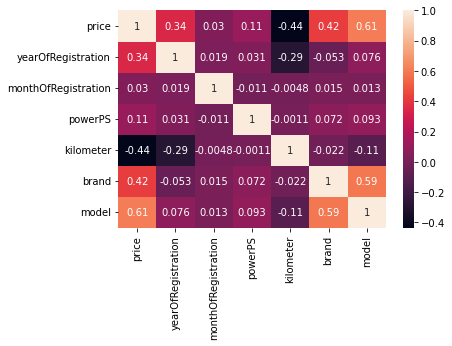

In [113]:
sns.heatmap(c2.corr(),annot=True)
# model, kilometer, brand and year of registration are important factors for the priceof cars

In [114]:
# From this we can see that fuel type diesel,benzin are having internal collinearity and in vehicleType kleinwagen, kombi,limousine is also having collinearity